In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
def Q_factor_to_dataframe(dfin, tan_ma, tan_ms, tan_sa, tan_substrate, mer = True):
    if mer:
        df = dfin.copy()
        df['1/Q_MA_fixed'] = df['p_MA_fixed']*tan_ma
        df['1/Q_MS_fixed'] = df['p_MS_fixed']*tan_ms
        df['1/Q_SA_fixed'] = df['p_SA_fixed']*tan_sa
        df['1/Q_substrate_fixed'] = df['p_substrate_fixed']*tan_substrate
        df['1/Q'] = df['1/Q_MA_fixed'] + df['1/Q_MS_fixed'] + df['1/Q_SA_fixed'] + df['1/Q_substrate_fixed']
        df['Q_MA_fixed'] = 1./df['1/Q_MA_fixed']
        df['Q_MS_fixed'] = 1./df['1/Q_MS_fixed']
        df['Q_SA_fixed'] = 1./df['1/Q_SA_fixed']
        df['Q_substrate_fixed'] = 1./df['1/Q_substrate_fixed']
        df['Q'] = 1./df['1/Q']
        df['tan_ma']=tan_ma
        df['tan_ms']=tan_ms
        df['tan_sa']=tan_sa
        df['tan_substrate']=tan_substrate
    else:
        df = dfin.copy()
        print(df['p_MA']*tan_ma)
        df['1/Q_MA'] = df['p_MA']*tan_ma
        df['1/Q_MS'] = df['p_MS']*tan_ms
        df['1/Q_SA'] = df['p_SA']*tan_sa
        df['1/Q_substrate'] = df['p_substrate']*tan_substrate
        df['1/Q'] = df['1/Q_MA'] + df['1/Q_MS'] + df['1/Q_SA'] + df['1/Q_substrate']
        df['Q_MA'] = 1./df['1/Q_MA']
        df['Q_MS'] = 1./df['1/Q_MS']
        df['Q_SA'] = 1./df['1/Q_SA']
        df['Q_substrate'] = 1./df['1/Q_substrate']
        df['Q'] = 1./df['1/Q']
        df['tan_ma']=tan_ma
        df['tan_ms']=tan_ms
        df['tan_sa']=tan_sa
        df['tan_substrate']=tan_substrate
    return df

In [19]:
eigenmode_paths=[
    'libraries/sweeps/clockmon_eigenmode_epr_thesis.csv',
    'libraries/sweeps/clockmon_eigenmode_epr_mer_thesis.csv'
]
names = [
    'Clockmon',
    'Clocmon - 2D-3D'
]


In [20]:
# From https://arxiv.org/abs/2012.10761

ma_vals = [9.9e-3]
ms_vals = [3.5e-4]
sa_vals = [1.7e-3]

substrate_vals = [1.3e-7]
case_names = [f"ms:{ms}, ma:{ma}, sa:{sa}, substrate:{substrate}"
              for ms, ma, sa, substrate in zip(ms_vals, ma_vals, sa_vals, substrate_vals)]

mers = [False, True]
dfs = []
for i_tan in range(len(ma_vals)):
    for i, epath in enumerate(eigenmode_paths):
        df = pd.read_csv(epath)
        df['case']=df.index*0+i_tan
        dfs.append(Q_factor_to_dataframe(df, ma_vals[i_tan], ms_vals[i_tan], sa_vals[i_tan], substrate_vals[i_tan], mers[i]))

df = pd.concat(dfs)

0    1.388973e-08
Name: p_MA, dtype: float64


In [21]:
df['Q']

0    4.319991e+06
0    2.311370e+06
Name: Q, dtype: float64

In [22]:
f = 5e9
omega = 2.*np.pi*f
df['T1']=df['Q']/omega*1e6
df['T1']

0    137.509588
0     73.573187
Name: T1, dtype: float64

In [23]:
clockmon_ma = df.iloc[0]["p_MA"]
clockmon_sa = df.iloc[0]["p_SA"]
clockmon_ms = df.iloc[0]["p_MS"]
clockmon_substrate = df.iloc[0]["p_substrate"]
clockmon_air = df.iloc[0]["p_vacuum"]


clockmon_ma_mer = df.iloc[1]["p_MA_fixed"]
clockmon_sa_mer = df.iloc[1]["p_SA_fixed"]
clockmon_ms_mer = df.iloc[1]["p_MS_fixed"]
clockmon_substrate_mer = df.iloc[1]["p_substrate_fixed"]
clockmon_air_mer = df.iloc[1]["p_vacuum_fixed"]

In [24]:
clockmon_ms, clockmon_ms_mer

(7.86305972915862e-06, 1.4330781083783444e-05)

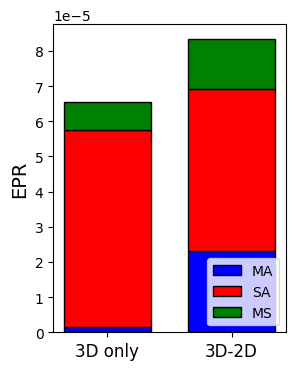

In [25]:
mer = [clockmon_ma_mer, clockmon_sa_mer, clockmon_ms_mer]
nonmer = [clockmon_ma, clockmon_sa, clockmon_ms]

# Data for plotting
categories = ['3D only', '3D-2D']
MA = [nonmer[0], mer[0]]
SA = [nonmer[1], mer[1]]
MS = [nonmer[2], mer[2]]

# Create the plot
fig, ax = plt.subplots()
fig.set_size_inches(3, 4)  
bar_width = 0.7
r1 = range(len(categories))

ax.bar(r1, MA, color='b', edgecolor='black', width=bar_width, label='MA')
ax.bar(r1, SA, bottom=MA, color='r', edgecolor='black', width=bar_width, label='SA')
ax.bar(r1, MS, bottom=[i+j for i,j in zip(MA, SA)], color='g', edgecolor='black', width=bar_width, label='MS')
offset = ax.yaxis.get_offset_text()
# offset.set_transform(ax.transAxes)
# offset.set_position((0, 1e-6))
# ax.set_xlabel('Categories', fontweight='bold')
ax.set_ylabel('EPR', fontsize = 14)
ax.set_xticks(r1)
ax.set_xticklabels(categories, fontsize=12)
ax.legend(loc="lower right")
plt.show()

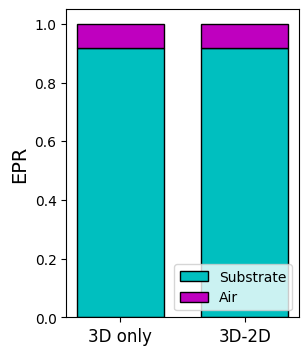

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(3, 4)  # Adjust the width and height as needed

categories = ['3D only', '3D-2D']
substrate = [clockmon_substrate, clockmon_substrate_mer ]
air = [clockmon_air, clockmon_air_mer]

bar_width = 0.7
r1 = range(len(categories))

ax.bar(r1, substrate, color='c', edgecolor='black', width=bar_width, label='Substrate')
ax.bar(r1, air, bottom=substrate, color='m', edgecolor='black', width=bar_width, label='Air')

# ax.set_xlabel('Categories', fontweight='bold')
ax.set_ylabel('EPR', fontsize = 14)
ax.set_xticks(r1)
ax.set_xticklabels(categories, fontsize=12)
ax.legend(loc='lower right') 
plt.show()